In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
import pandas as pd
import numpy as np

/Users/jonathan/miniconda3/envs/eda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
df = pd.read_csv("../data/MetObjects.csv")

/Users/jonathan/miniconda3/envs/eda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty',
       'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Metadata Date',
       'Repository'],
      dtype='object')

In [28]:
df['Object Name'].value_counts()

Print                                                                         97955
Photograph                                                                    29432
Drawing                                                                       25289
Book                                                                          13461
Fragment                                                                       9666
Piece                                                                          8630
Painting                                                                       6092
Negative                                                                       5940
Baseball card, print                                                           5543
Baseball card                                                                  4605
Bowl                                                                           3554
Figure                                                                      

In [33]:
paintings = df[df['Classification'] == 'Paintings']

In [35]:
len(paintings)

11476

In [36]:
paintings[['Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type',]].head()

,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type
409,Maker,NaN,Louis Benjamin Huber Defeuille,NaN,NaN,"Defeuille, Louis Benjamin Huber",NaN,NaN,9999,1800–1883,1800,1883,Ivory,3 1/4 x 2 5/8 in. (8.3 x 6.7 cm),"Gift of William H. Huntington, 1883",Made in
410,Artist|Artist,After,Jacques Thouron|Weyller,NaN,NaN,"Thouron, Jacques|Weyller",NaN,NaN,9999 |9999,1776–1883,1776,1883,Enamel,2 3/8 x 2 in. (6 x 5.1 cm),"Gift of William H. Huntington, 1883",Made in
411,Artist,After,Jacques Thouron,NaN,NaN,"Thouron, Jacques",NaN,NaN,9999,1776–1883,1776,1883,Ivory,Diam. 3 3/16 in. (8.1 cm),"Gift of William H. Huntington, 1883",Made in
412,Artist,After,Jacques Thouron,NaN,NaN,"Thouron, Jacques",NaN,NaN,9999,1776–1883,1776,1883,Enamel,3 7/8 x 2 7/8 in. (9.8 x 7.3 cm),"Gift of William H. Huntington, 1883",Made in
413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1776–1883,1776,1883,Probably porcelain,3 x 2 3/8 in. (7.6 x 6 cm),"Gift of William H. Huntington, 1883",Made in


In [38]:
import missingno as msno

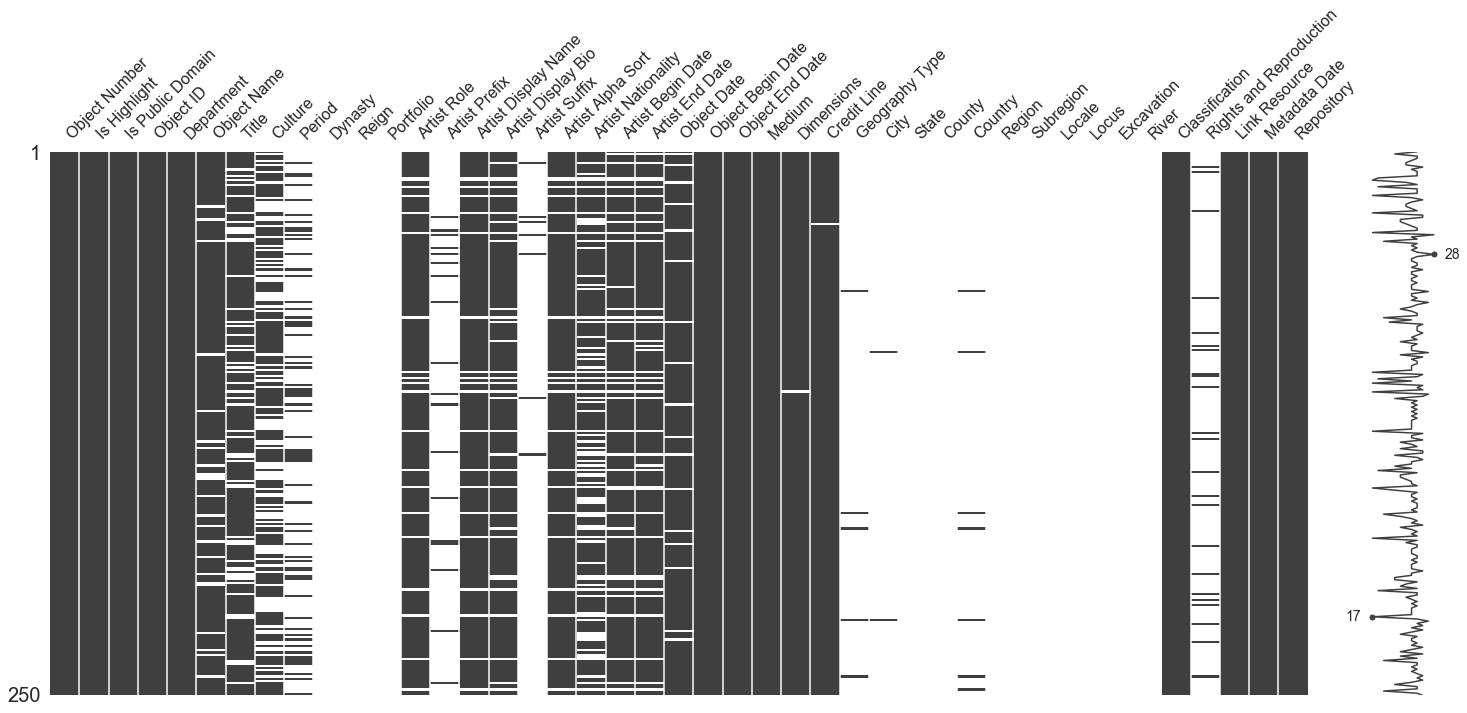

In [39]:
msno.matrix(paintings.sample(250))

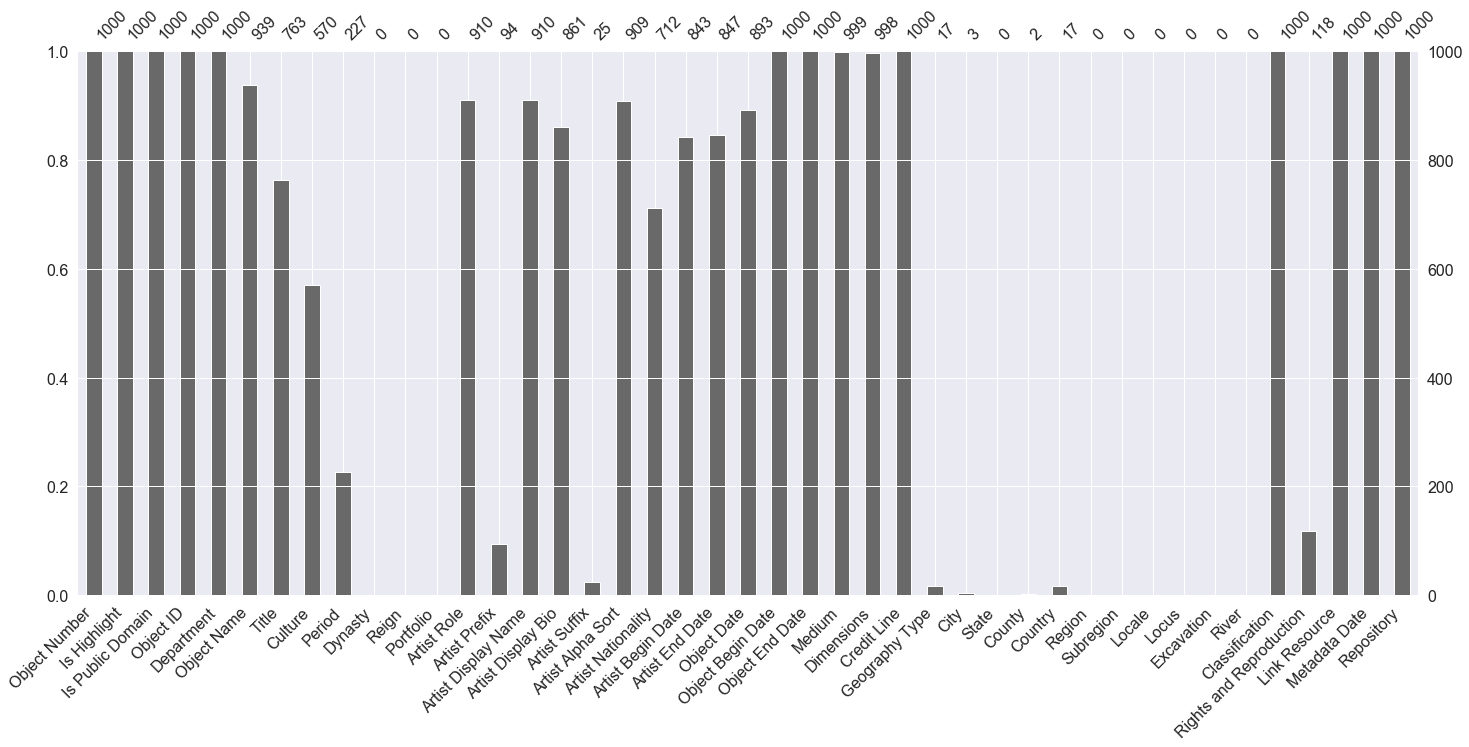

In [42]:
msno.bar(paintings.sample(1000));

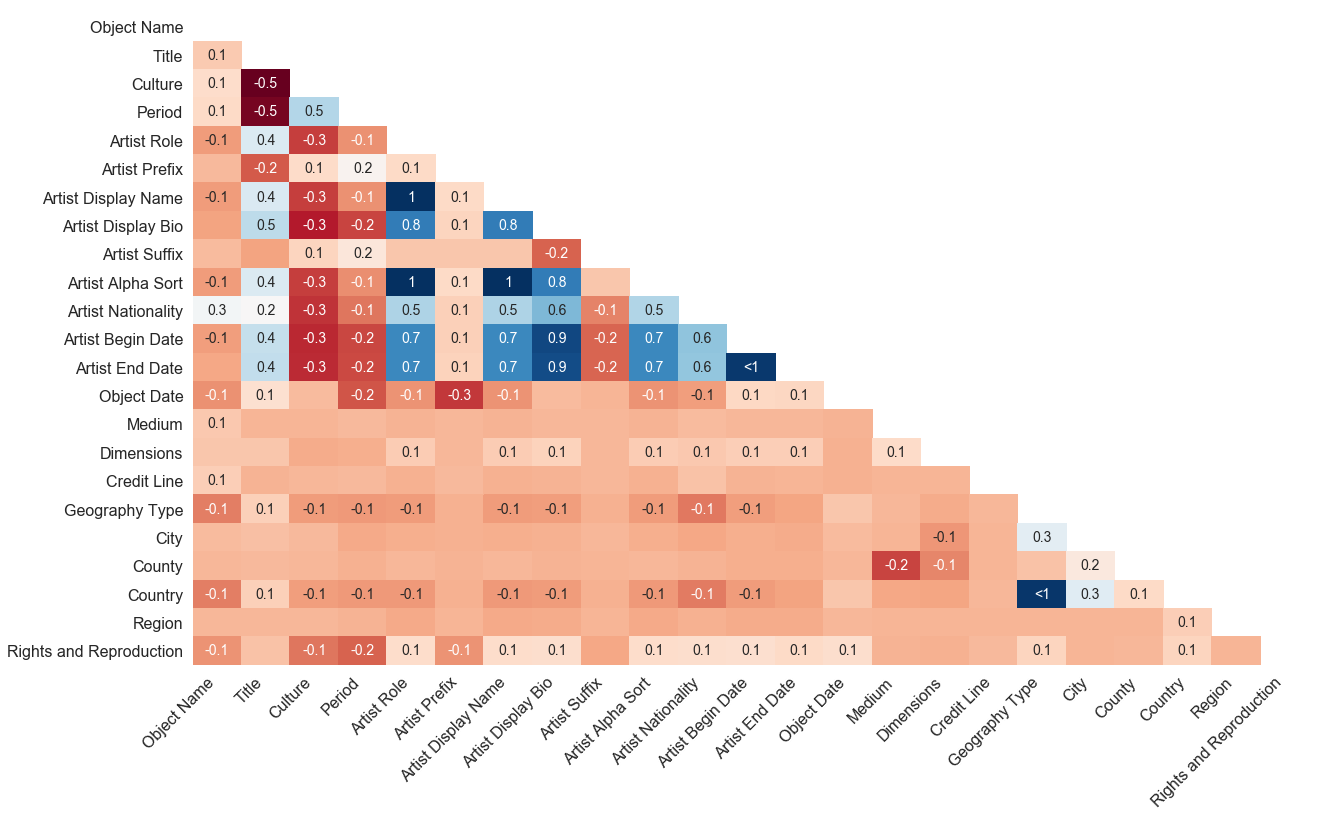

In [43]:
msno.heatmap(paintings)

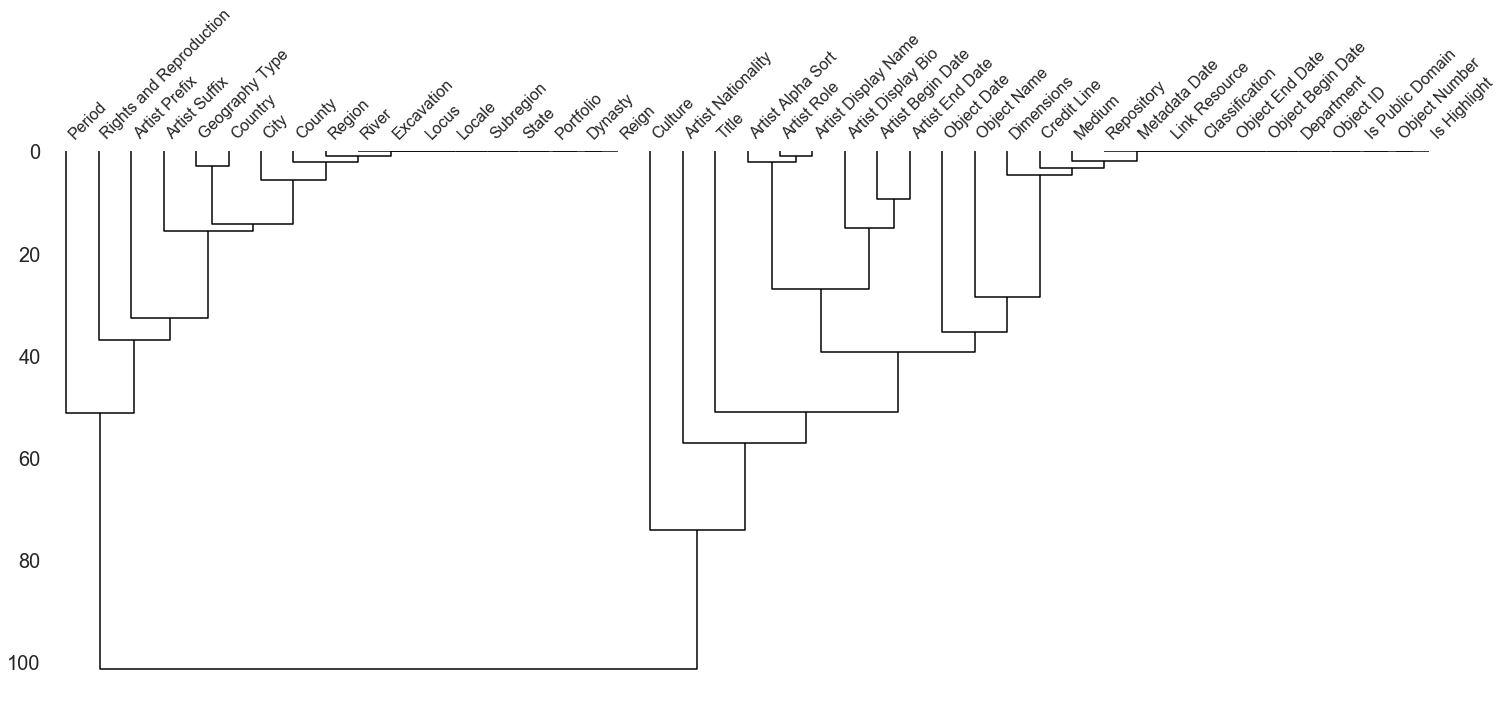

In [45]:
msno.dendrogram(paintings);

In [48]:
artist_columns = [
    'Artist Role',
    'Artist Prefix',
    'Artist Display Name',
    'Artist Display Bio',
    'Artist Suffix',
    'Artist Alpha Sort',
    'Artist Nationality',
    'Artist Begin Date',
    'Artist End Date',
]

In [46]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty',
       'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Metadata Date',
       'Repository'],
      dtype='object')

In [40]:
paintings['Artist Nationality'].value_counts()

American                                                                           2021
Chinese                                                                            1583
French                                                                             1021
Japanese                                                                            648
Italian                                                                             607
Dutch                                                                               253
British                                                                             219
Spanish                                                                             167
Netherlandish                                                                       159
German                                                                              151
Indian                                                                              125
Flemish                         

In [8]:
df.head(10)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
5,67.265.12,False,False,6,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
6,67.265.13,False,False,7,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
7,67.265.14,False,False,8,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/8,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
8,67.265.15,False,False,9,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/9,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
9,1979.486.3,False,False,10,American Decorative Arts,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/10,8/13/2018 8:00:01 AM,"Metropolitan Museum of Art, New York, NY"
